In [1]:
import netCDF4 as nc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import openpyxl
import calendar
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from to_import_func_meteo import get_coordinates, selected_time, plot_image_interval

In [2]:
prcp1930 = nc.Dataset('D:/DaymetCH/ch_prcp_1930-2018_m_ch1903.nc4')
tave1930 = nc.Dataset('D:/DaymetCH/ch_tave_1930-2018_m_ch1903.nc4')
prcp2019 =  nc.Dataset('D:/DaymetCH/ch_prcp_2019_m_ch1903.nc4')
prcp2020 =  nc.Dataset('D:/DaymetCH/ch_prcp_2020_m_ch1903.nc4')
tave2019 =  nc.Dataset('D:/DaymetCH/ch_tave_2019_m_ch1903.nc4')
tave2020 =  nc.Dataset('D:/DaymetCH/ch_tave_2020_m_ch1903.nc4')

In [3]:
dataplot = get_coordinates('LFI4','NFI_data/source data/PLOTDATEN.xlsx')
dataplot

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2363,2364,2365,2366,2367,2368,2369,2370,2371,2372,2373,2374,2375,2376,2377,2378,2379,2380,2381,2382,2383,2384,2385,2386,2387,2388,2389,2390,2391,2392,2393,2394,2395,2396,2397,2398,2399,2400,2401,2402
DATUMF,982,993,966,1017,1011,963,998,1011,1035,962,1046,975,1011,987,1035,1036,982,982,1023,1035,987,1041,975,982,1053,1053,1023,1011,1026,1041,987,963,999,999,982,981,969,981,1047,1046,...,969,1049,1014,991,1040,993,1040,969,1005,968,1025,1052,1014,1053,1038,1035,966,968,981,968,1005,1025,1053,1013,1053,1013,968,1038,968,993,1035,968,1005,981,1025,1053,1013,993,1035,1005
X,1288,1289,1320,1317,1323,1326,1307,1326,1279,1314,1285,1237,1254,1241,1255,1261,1318,1330,1349,1246,1328,1342,1225,1261,1336,1342,1352,1356,1358,1351,1355,1332,1334,1346,1348,1360,1362,1366,1237,1363,...,1317,1174,1176,1181,1315,1319,1321,1314,1316,1320,1175,1315,1317,1321,1318,1324,1173,1317,1321,1323,1325,1316,1318,1320,1324,1326,1317,1321,1323,1325,1327,1320,1322,1324,1319,1321,1323,1322,1324,1325
Y,1353,1348,1341,1340,1340,1339,1338,1331,1330,1329,1328,1326,1325,1324,1324,1324,1323,1323,1322,1321,1321,1321,1320,1320,1319,1319,1319,1319,1319,1318,1318,1317,1317,1317,1317,1317,1317,1317,1316,1316,...,1152,1151,1151,1150,1150,1150,1150,1149,1149,1149,1148,1148,1148,1148,1147,1147,1146,1146,1146,1146,1146,1145,1145,1145,1145,1145,1144,1144,1144,1144,1144,1143,1143,1143,1142,1142,1142,1141,1141,1140


LFI1 = March 1983 to October 1985. 638:669<br>
Interval LFI1-2 = 670:759<br>
LFI2 = May 1993 to May 1996. 760:796<br>
Interval LFI2-3 = 797:890<br>
LFI3 = April 2004 to November 2006. 891:922<br>
Interval LFI3-4 = 923:1053<br>
LFI4 = November 2009 to November 2017. 958:1054<br>

Calculating average precipitation per month in central square km of forest plots, with campaigns intervals

In [ ]:
lfi1,int1_2,lfi2,int2_3,lfi3,int3_4,lfi4 = [638,669],[670,759],[760,796],[797,890],[891,922],[923,1053],[958,1054]
periods = lfi1,int1_2,lfi2,int2_3,lfi3,int3_4,lfi4
precipitations = []
for i in range(len(periods)):
    for j in range(dataplot.shape[1]):
        prep = []
        x,y = periods[i][0], periods[i][1]
        prep.append(prcp1930.variables['prcp'][x:y,dataplot[j][1],dataplot[j][2]].compressed().mean())
    precipitations.append(np.mean(prep))

In [5]:
print(precipitations)

[10.279111, 10.148597, 10.475166, 10.270714, 9.822878, 9.521699, 9.374484]


Calculating average temperature per month in central square km of forest plots, with campaigns intervals

In [ ]:
temperatures = []
for i in range(len(periods)):
    for j in range(dataplot.shape[1]):
        prep = []
        x,y = periods[i][0], periods[i][1]
        prep.append(tave1930.variables['tave'][x:y,dataplot[j][1],dataplot[j][2]].compressed().mean())
    temperatures.append(np.mean(prep))

In [6]:
print(temperatures)

[8.574379, 7.91871, 8.698456, 8.762475, 9.477132, 8.882103, 8.8656645]


In [7]:
name_periods = ['lfi1','int1_2','lfi2','int2_3','lfi3','int3_4','lfi4']
time_periods = ['1','2','3','4','5','6','7']
df = name_periods,time_periods,precipitations,temperatures
df = pd.DataFrame(df,index=['LFI','TIME','PRCP','TAVE']).T

In [8]:
df

,LFI,TIME,PRCP,TAVE
0,lfi1,1,10.279111,8.574379
1,int1_2,2,10.148597,7.91871
2,lfi2,3,10.475166,8.698456
3,int2_3,4,10.270714,8.762475
4,lfi3,5,9.822878,9.477132
5,int3_4,6,9.521699,8.882103
6,lfi4,7,9.374484,8.865664


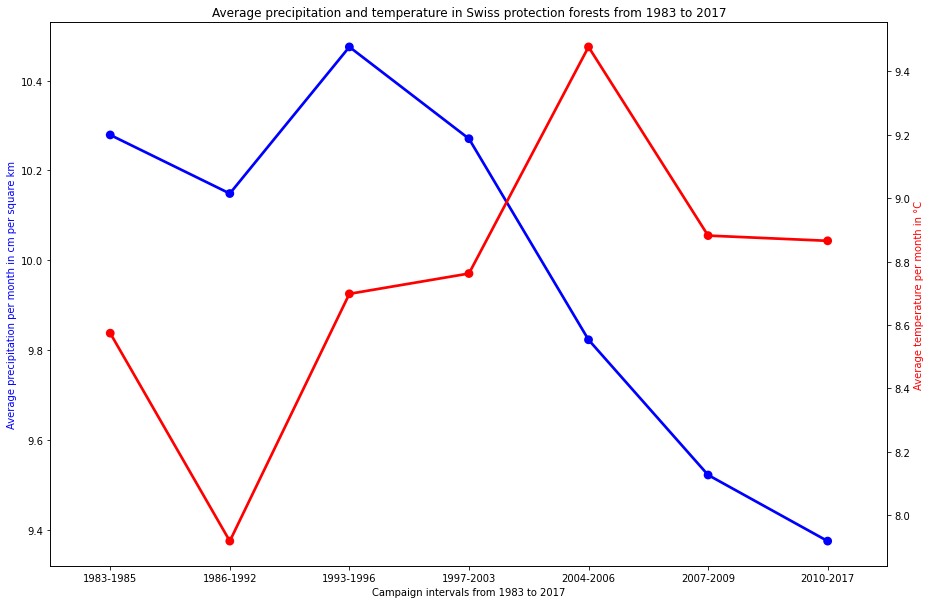

In [9]:
fig, ax1 = plt.subplots(figsize = (15,10)) 
ax2 = ax1.twinx()

sns.pointplot(x='TIME',y='PRCP', data = df, ax=ax1,color='b') 
sns.pointplot(x='TIME',y='TAVE', data = df, ax=ax2,color='r')
ax1.set_title('Average precipitation and temperature in Swiss protection forests from 1983 to 2017')
ax1.set_xticklabels(["1983-1985","1986-1992","1993-1996","1997-2003","2004-2006","2007-2009","2010-2017"])  
ax1.set_xlabel('Campaign intervals from 1983 to 2017')
ax1.set_ylabel('Average precipitation per month in cm per square km', color='b')
ax2.set_ylabel('Average temperature per month in °C', color='r')
plt.gcf().set_facecolor("white")
plt.show()

In [13]:
# getting more stable time periods in a wider range spanning 4 decades : every 2 years since 1979
periods = [588,601],[602,635],[636,659],[660,683],[684,707],[708,731],[732,755],[756,779],[780,803],[804,827], \
    [828,851],[852,875],[876,899],[900,923],[924,947],[948,971],[972,995],[996,1019],[1020,1043],[1044,1067]

precipitations = []
for i in range(len(periods)):
    for j in range(dataplot.shape[1]):
        prep = []
        x,y = periods[i][0], periods[i][1]
        prep.append(prcp1930.variables['prcp'][x:y,dataplot[j][1],dataplot[j][2]].compressed().mean())
    precipitations.append(np.mean(prep))

temperatures = []
for i in range(len(periods)):
    for j in range(dataplot.shape[1]):
        prep = []
        x,y = periods[i][0], periods[i][1]
        prep.append(tave1930.variables['tave'][x:y,dataplot[j][1],dataplot[j][2]].compressed().mean())
    temperatures.append(np.mean(prep))

print(temperatures)
print(precipitations)

[7.0230823, 8.356579, 8.185712, 7.7576327, 8.388098, 9.203967, 8.67211, 9.237986, 8.411687, 8.99417, 9.100164, 9.151868, 9.235144, 8.803076, 9.20964, 8.799653, 9.454866, 9.042583, 9.4967375, 9.647556]
[11.51525, 11.451152, 10.154895, 10.374557, 11.913061, 9.636091, 9.434894, 9.984496, 10.088301, 9.097431, 11.526636, 12.085821, 8.427918, 9.713243, 10.645255, 8.383956, 8.593645, 10.509157, 10.019932, 8.2072115]


In [14]:
name_periods = ["1979-1980","1981-1982","1983-1984","1985-1986","1987-1988","1989-1990","1991-1992","1993-1994",
"1995-1996","1997-1998","1999-2000","2001-2002","2003-2004","2005-2006","2007-2008","2009-2010","2011-2012","2013-2014","2015-2016","2017-2018"]
df = name_periods,precipitations,temperatures
df = pd.DataFrame(df,index=['TIME','PRCP','TAVE']).T
df.loc[len(df)] = ["2019-2020", 9.470414, 10.13557]
df

,TIME,PRCP,TAVE
0,1979-1980,11.51525,7.023082
1,1981-1982,11.451152,8.356579
2,1983-1984,10.154895,8.185712
3,1985-1986,10.374557,7.757633
4,1987-1988,11.913061,8.388098
5,1989-1990,9.636091,9.203967
6,1991-1992,9.434894,8.67211
7,1993-1994,9.984496,9.237986
8,1995-1996,10.088301,8.411687
9,1997-1998,9.097431,8.99417


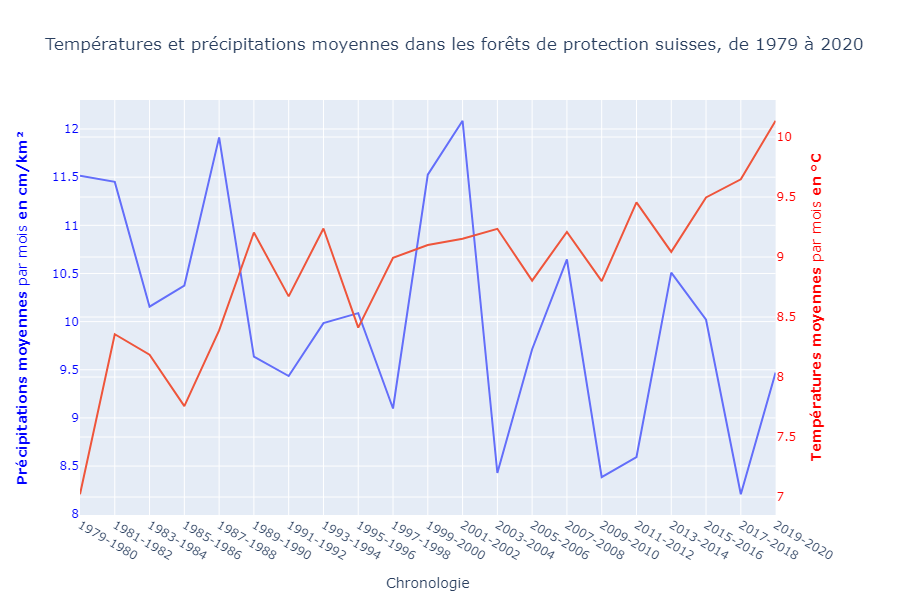

In [16]:
#plotly for a prettier graph and titles in french for our presentation
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=df['TIME'], y=df['PRCP']),secondary_y=False)
fig.add_trace(
    go.Scatter(x=df['TIME'], y=df['TAVE']),secondary_y=True)

fig.update_layout(width=900,height=600,showlegend=False,
    title_text="Températures et précipitations moyennes dans les forêts de protection suisses, de 1979 à 2020")

fig.update_xaxes(title_text="Chronologie")
fig.update_yaxes(title_text="<b>Précipitations moyennes</b> par mois <b>en cm/km²</b>", secondary_y=False,color='blue')
fig.update_yaxes(title_text="<b>Températures moyennes</b> par mois <b>en °C</b>", secondary_y=True,color='red') 
fig.show("png")